In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (11, 6)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall

from sklearn.metrics import classification_report, confusion_matrix
import random

#### import the data

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [3]:
#preview the data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
#check general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

we dont have null values

#### check the statistical distribution of the dataset

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


#### check for class imbalance in the target variable

In [6]:
df['benign_0__mal_1'].value_counts(normalize=True).to_frame()

,proportion
benign_0__mal_1,
1,0.627417
0,0.372583


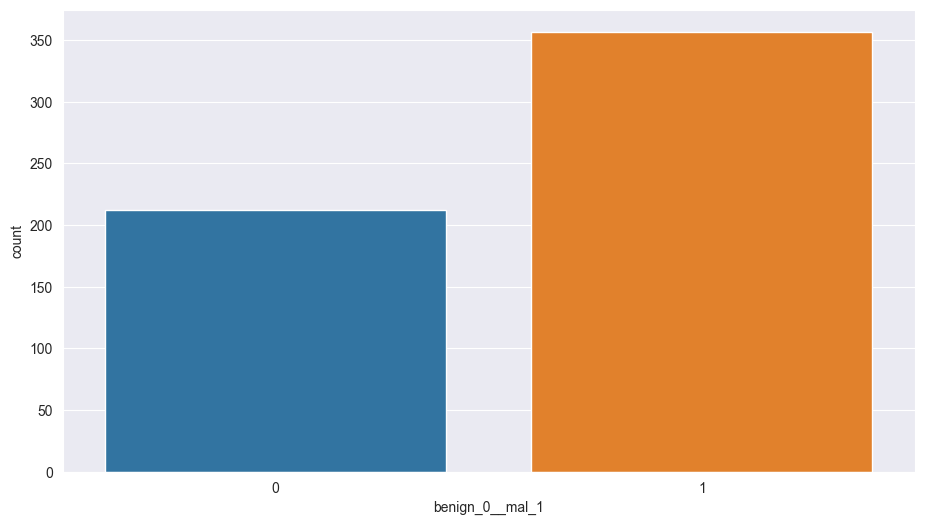

In [7]:
sns.countplot(x='benign_0__mal_1', data=df);

There is an indication of class imbalance in the target variable.The proportion of instances labeled as benign (0) is approximately 37.3%, while the proportion of instances labeled as malignant (1) is approximately 62.7%.

#### check for correlation in features with respect to the target variable(benign_0__mal_1)

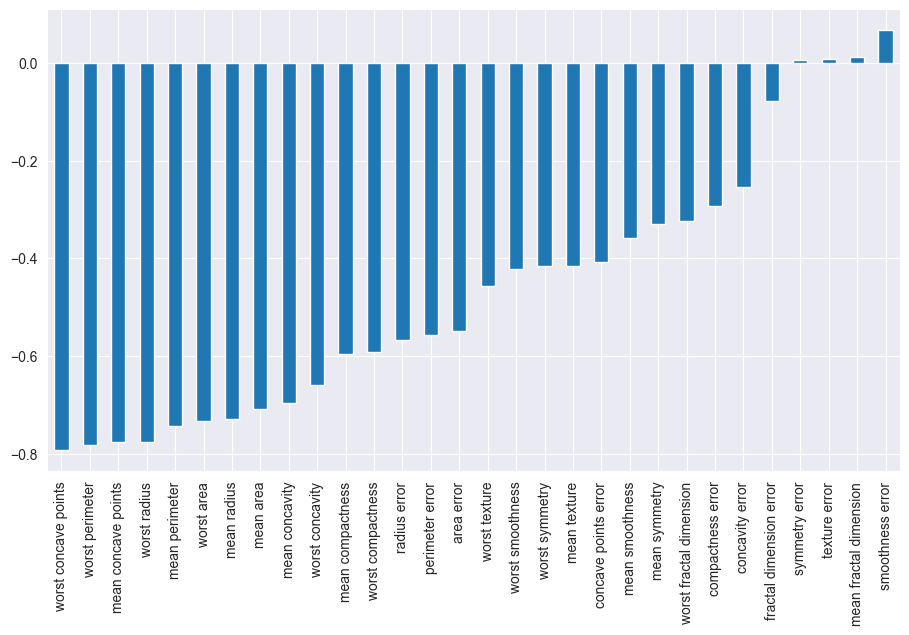

In [8]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

Most features are strongly negatively correlated to the target variable

#### Plot a heatmap to show feature correlation

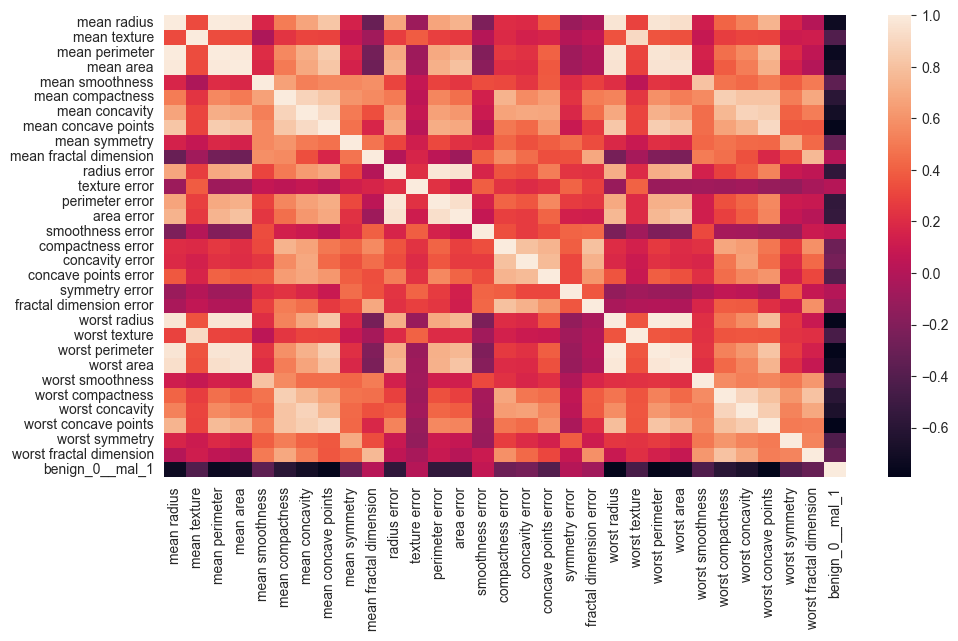

In [9]:
sns.heatmap(df.corr());

#### Separate the target variable from features

In [10]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

#### Train Test Split

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
#check the shape of the train set to determin the number of neurons to use
X_train.shape

(426, 30)

#### Define a function to compute the F1 score

In [16]:
# Define a function to compute the F1 score
#make the results reproducible
random.seed(123)
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

@tf.function
def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    f1 = 2 * ((prec * rec) / (prec + rec + tf.keras.backend.epsilon()))
    return f1

#### Modeling

In [23]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=[f1_score])

#### Train the model

In [24]:
model = model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6895 - f1_score: 0.9799 - val_loss: 0.6787 - val_f1_score: 0.9797
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6649 - f1_score: 0.9795 - val_loss: 0.6533 - val_f1_score: 0.9794
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6406 - f1_score: 0.9793 - val_loss: 0.6234 - val_f1_score: 0.9792
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6023 - f1_score: 0.9791 - val_loss: 0.5737 - val_f1_score: 0.9790
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5530 - f1_score: 0.9789 - val_loss: 0.5238 - val_f1_score: 0.9789
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5027 - f1_score: 0.9788 - val_loss: 0.4699 - val_f1_score: 0.9788
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4494 - f1_score: 0.9787 - val_loss: 0.4140 - val_f1_score: 0.9787
Epoch 8/600


Epoch 59/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0729 - f1_score: 0.9781 - val_loss: 0.1195 - val_f1_score: 0.9781
Epoch 60/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0641 - f1_score: 0.9781 - val_loss: 0.1249 - val_f1_score: 0.9781
Epoch 61/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0587 - f1_score: 0.9781 - val_loss: 0.1145 - val_f1_score: 0.9781
Epoch 62/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0596 - f1_score: 0.9781 - val_loss: 0.1171 - val_f1_score: 0.9781
Epoch 63/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0583 - f1_score: 0.9782 - val_loss: 0.1194 - val_f1_score: 0.9782
Epoch 64/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0585 - f1_score: 0.9782 - val_loss: 0.1167 - val_f1_score: 0.9782
Epoch 65/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0593 - f1_score: 0.9782 - val_loss: 0.1176 - val_f1_score: 0.9782
Epoch 

14/14 [==============================] - 0s 3ms/step - loss: 0.0487 - f1_score: 0.9785 - val_loss: 0.1370 - val_f1_score: 0.9785
Epoch 117/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0473 - f1_score: 0.9786 - val_loss: 0.1314 - val_f1_score: 0.9786
Epoch 118/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0469 - f1_score: 0.9786 - val_loss: 0.1384 - val_f1_score: 0.9786
Epoch 119/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0462 - f1_score: 0.9786 - val_loss: 0.1328 - val_f1_score: 0.9786
Epoch 120/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0475 - f1_score: 0.9786 - val_loss: 0.1356 - val_f1_score: 0.9786
Epoch 121/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0462 - f1_score: 0.9786 - val_loss: 0.1370 - val_f1_score: 0.9786
Epoch 122/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0460 - f1_score: 0.9786 - val_loss: 0.1365 - val_f1_score: 0.9786
Epoch 123/600

14/14 [==============================] - 0s 3ms/step - loss: 0.0381 - f1_score: 0.9789 - val_loss: 0.1429 - val_f1_score: 0.9790
Epoch 174/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0382 - f1_score: 0.9790 - val_loss: 0.1477 - val_f1_score: 0.9790
Epoch 175/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0374 - f1_score: 0.9790 - val_loss: 0.1409 - val_f1_score: 0.9790
Epoch 176/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0400 - f1_score: 0.9790 - val_loss: 0.1527 - val_f1_score: 0.9790
Epoch 177/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0387 - f1_score: 0.9790 - val_loss: 0.1389 - val_f1_score: 0.9790
Epoch 178/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0366 - f1_score: 0.9790 - val_loss: 0.1487 - val_f1_score: 0.9790
Epoch 179/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0397 - f1_score: 0.9790 - val_loss: 0.1529 - val_f1_score: 0.9790
Epoch 180/600

14/14 [==============================] - 0s 3ms/step - loss: 0.0306 - f1_score: 0.9794 - val_loss: 0.1690 - val_f1_score: 0.9794
Epoch 231/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0376 - f1_score: 0.9794 - val_loss: 0.1438 - val_f1_score: 0.9794
Epoch 232/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0299 - f1_score: 0.9794 - val_loss: 0.1690 - val_f1_score: 0.9794
Epoch 233/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0300 - f1_score: 0.9794 - val_loss: 0.1521 - val_f1_score: 0.9794
Epoch 234/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0296 - f1_score: 0.9794 - val_loss: 0.1581 - val_f1_score: 0.9794
Epoch 235/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0356 - f1_score: 0.9794 - val_loss: 0.1595 - val_f1_score: 0.9794
Epoch 236/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0341 - f1_score: 0.9794 - val_loss: 0.1523 - val_f1_score: 0.9794
Epoch 237/600

14/14 [==============================] - 0s 3ms/step - loss: 0.0235 - f1_score: 0.9799 - val_loss: 0.1604 - val_f1_score: 0.9799
Epoch 288/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0208 - f1_score: 0.9799 - val_loss: 0.1790 - val_f1_score: 0.9799
Epoch 289/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0211 - f1_score: 0.9799 - val_loss: 0.1570 - val_f1_score: 0.9799
Epoch 290/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0259 - f1_score: 0.9799 - val_loss: 0.1709 - val_f1_score: 0.9799
Epoch 291/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0222 - f1_score: 0.9799 - val_loss: 0.1617 - val_f1_score: 0.9799
Epoch 292/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0216 - f1_score: 0.9799 - val_loss: 0.1670 - val_f1_score: 0.9799
Epoch 293/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0207 - f1_score: 0.9799 - val_loss: 0.1656 - val_f1_score: 0.9799
Epoch 294/600

14/14 [==============================] - 0s 2ms/step - loss: 0.0175 - f1_score: 0.9805 - val_loss: 0.1784 - val_f1_score: 0.9805
Epoch 345/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0154 - f1_score: 0.9805 - val_loss: 0.1853 - val_f1_score: 0.9805
Epoch 346/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0160 - f1_score: 0.9805 - val_loss: 0.1790 - val_f1_score: 0.9805
Epoch 347/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0200 - f1_score: 0.9805 - val_loss: 0.1805 - val_f1_score: 0.9805
Epoch 348/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0191 - f1_score: 0.9805 - val_loss: 0.1907 - val_f1_score: 0.9805
Epoch 349/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0163 - f1_score: 0.9805 - val_loss: 0.1831 - val_f1_score: 0.9805
Epoch 350/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0158 - f1_score: 0.9805 - val_loss: 0.1842 - val_f1_score: 0.9805
Epoch 351/600

14/14 [==============================] - 0s 3ms/step - loss: 0.0110 - f1_score: 0.9811 - val_loss: 0.2110 - val_f1_score: 0.9811
Epoch 402/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0116 - f1_score: 0.9811 - val_loss: 0.2276 - val_f1_score: 0.9811
Epoch 403/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0112 - f1_score: 0.9811 - val_loss: 0.2034 - val_f1_score: 0.9811
Epoch 404/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0121 - f1_score: 0.9811 - val_loss: 0.2152 - val_f1_score: 0.9811
Epoch 405/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0111 - f1_score: 0.9812 - val_loss: 0.2102 - val_f1_score: 0.9812
Epoch 406/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0106 - f1_score: 0.9812 - val_loss: 0.2256 - val_f1_score: 0.9812
Epoch 407/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0125 - f1_score: 0.9812 - val_loss: 0.2070 - val_f1_score: 0.9812
Epoch 408/600

14/14 [==============================] - 0s 3ms/step - loss: 0.0113 - f1_score: 0.9817 - val_loss: 0.2378 - val_f1_score: 0.9817
Epoch 459/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0082 - f1_score: 0.9817 - val_loss: 0.2421 - val_f1_score: 0.9817
Epoch 460/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0078 - f1_score: 0.9817 - val_loss: 0.2384 - val_f1_score: 0.9817
Epoch 461/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0080 - f1_score: 0.9817 - val_loss: 0.2371 - val_f1_score: 0.9817
Epoch 462/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0079 - f1_score: 0.9817 - val_loss: 0.2371 - val_f1_score: 0.9817
Epoch 463/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0081 - f1_score: 0.9817 - val_loss: 0.2549 - val_f1_score: 0.9818
Epoch 464/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0090 - f1_score: 0.9818 - val_loss: 0.2306 - val_f1_score: 0.9818
Epoch 465/600

14/14 [==============================] - 0s 3ms/step - loss: 0.0057 - f1_score: 0.9823 - val_loss: 0.2643 - val_f1_score: 0.9823
Epoch 516/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0056 - f1_score: 0.9823 - val_loss: 0.2623 - val_f1_score: 0.9823
Epoch 517/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0055 - f1_score: 0.9823 - val_loss: 0.2763 - val_f1_score: 0.9823
Epoch 518/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0064 - f1_score: 0.9823 - val_loss: 0.2609 - val_f1_score: 0.9823
Epoch 519/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0057 - f1_score: 0.9823 - val_loss: 0.2667 - val_f1_score: 0.9823
Epoch 520/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0055 - f1_score: 0.9823 - val_loss: 0.2767 - val_f1_score: 0.9823
Epoch 521/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0053 - f1_score: 0.9823 - val_loss: 0.2647 - val_f1_score: 0.9823
Epoch 522/600

14/14 [==============================] - 0s 3ms/step - loss: 0.0039 - f1_score: 0.9827 - val_loss: 0.3068 - val_f1_score: 0.9827
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0037 - f1_score: 0.9828 - val_loss: 0.3000 - val_f1_score: 0.9828
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0038 - f1_score: 0.9828 - val_loss: 0.3106 - val_f1_score: 0.9828
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0039 - f1_score: 0.9828 - val_loss: 0.3100 - val_f1_score: 0.9828
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0040 - f1_score: 0.9828 - val_loss: 0.2994 - val_f1_score: 0.9828
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0039 - f1_score: 0.9828 - val_loss: 0.3058 - val_f1_score: 0.9828
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0039 - f1_score: 0.9828 - val_loss: 0.3157 - val_f1_score: 0.9828
Epoch 579/600

In [25]:
print(model.history.keys())

dict_keys(['loss', 'f1_score', 'val_loss', 'val_f1_score'])


In [26]:
# Fuction to plot loss and metrics vs number of epochs with train and validation sets
def visualize_training_results(results):
    history = results.history
    
    # create two axis objects side by side
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
    
    # plot loss on the first axis
    ax1.plot(history['val_loss'])
    ax1.plot(history['loss'])
    ax1.legend(['val_loss', 'loss'], loc='upper left', fontsize=9)
    ax1.set_title('Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    
    # plot recall and f1 score metrics on the second axis
   
    ax2.plot(history['val_f1_score'])  
    ax2.plot(history['f1_score'])
    ax2.legend(['val_f1_score', 'f1_score'], loc='upper left', fontsize=9)
    ax2.set_title('Recall and F1 score metrics')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Evaluation metrics')
    
    # display the plots
    plt.show()  

#### Model Evaluation and hyperparameter tuning

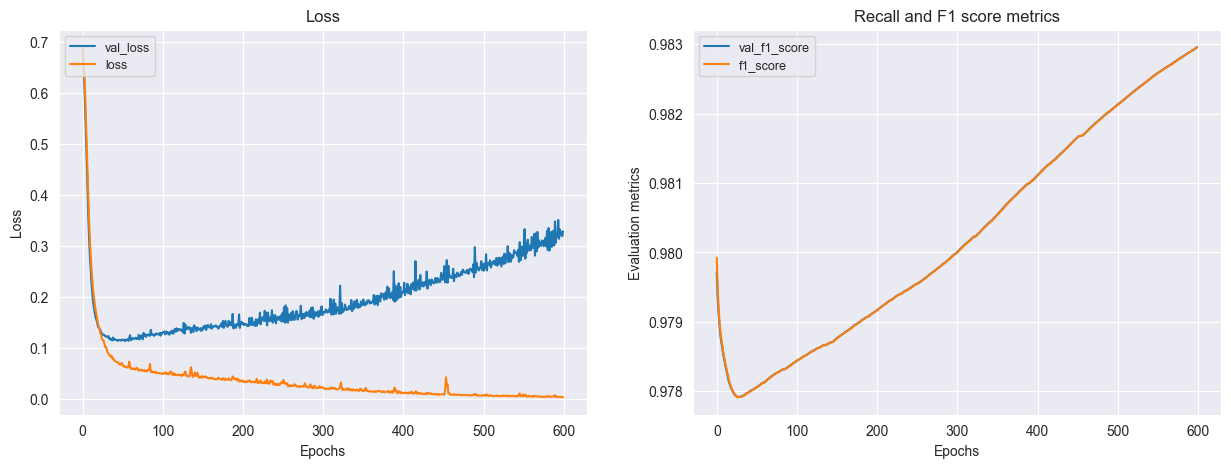

In [27]:
# call function to visualize loss and metrics
visualize_training_results(model)

The above plot shows overfitting as we can see the validation loss is increasing while the training loss continues to decrease. We will try to implement early stopping and Dropout to curb this

In [28]:
#define the early stop
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [29]:
model1 = Sequential()

model1.add(Dense(30, activation='relu'))
model1.add(Dense(15, activation='relu'))

model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=[f1_score])

In [30]:
model1 = model1.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6794 - f1_score: 0.9829 - val_loss: 0.6570 - val_f1_score: 0.9828
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6389 - f1_score: 0.9827 - val_loss: 0.6196 - val_f1_score: 0.9827
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6004 - f1_score: 0.9826 - val_loss: 0.5797 - val_f1_score: 0.9826
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5637 - f1_score: 0.9826 - val_loss: 0.5415 - val_f1_score: 0.9825
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5207 - f1_score: 0.9825 - val_loss: 0.4954 - val_f1_score: 0.9825
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4787 - f1_score: 0.9825 - val_loss: 0.4499 - val_f1_score: 0.9824
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4332 - f1_score: 0.9824 - val_loss: 0.4027 - val_f1_score: 0.9824
Epoch 8/600


Epoch 59/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0567 - f1_score: 0.9820 - val_loss: 0.0958 - val_f1_score: 0.9821
Epoch 60/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0572 - f1_score: 0.9821 - val_loss: 0.1151 - val_f1_score: 0.9821
Epoch 61/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0607 - f1_score: 0.9821 - val_loss: 0.0971 - val_f1_score: 0.9821
Epoch 62/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0650 - f1_score: 0.9821 - val_loss: 0.0974 - val_f1_score: 0.9821
Epoch 63/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0656 - f1_score: 0.9821 - val_loss: 0.1123 - val_f1_score: 0.9821
Epoch 64/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0554 - f1_score: 0.9821 - val_loss: 0.0992 - val_f1_score: 0.9821
Epoch 65/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0561 - f1_score: 0.9821 - val_loss: 0.1086 - val_f1_score: 0.9821
Epoch 

In [31]:
print(model1.history.keys())

dict_keys(['loss', 'f1_score', 'val_loss', 'val_f1_score'])


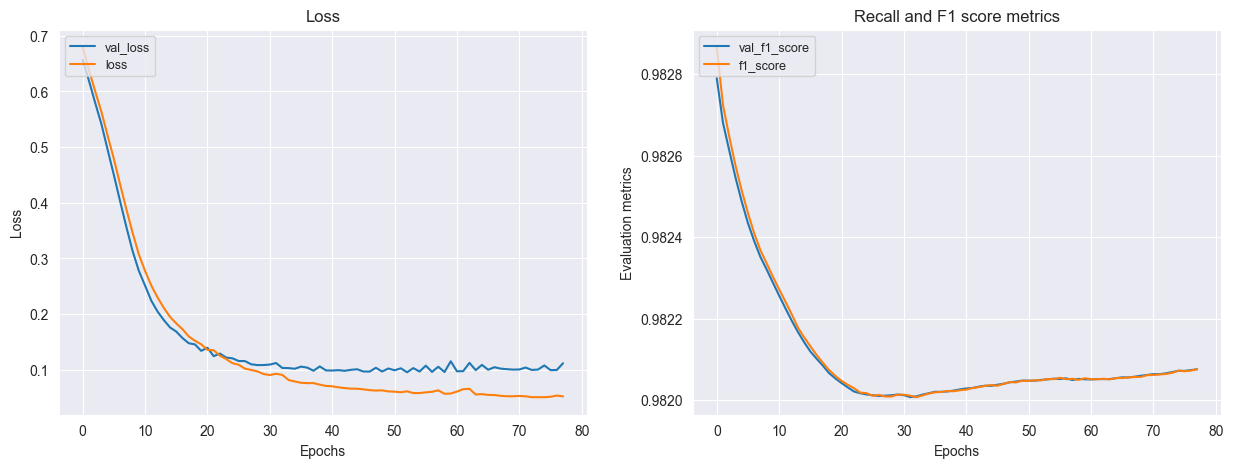

In [32]:
# call function to visualize loss and metrics
visualize_training_results(model1)

In [34]:
#add dropout layers
model2 = Sequential()

model2.add(Dense(30, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(15, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=[f1_score])

In [35]:
model2 = model2.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6729 - f1_score: 0.9820 - val_loss: 0.6430 - val_f1_score: 0.9818
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6397 - f1_score: 0.9817 - val_loss: 0.6151 - val_f1_score: 0.9817
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6496 - f1_score: 0.9816 - val_loss: 0.5937 - val_f1_score: 0.9815
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6195 - f1_score: 0.9814 - val_loss: 0.5735 - val_f1_score: 0.9813
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6032 - f1_score: 0.9812 - val_loss: 0.5481 - val_f1_score: 0.9812
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5857 - f1_score: 0.9811 - val_loss: 0.5228 - val_f1_score: 0.9810
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5584 - f1_score: 0.9810 - val_loss: 0.4923 - val_f1_score: 0.9809
Epoch 8/600


Epoch 59/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1418 - f1_score: 0.9794 - val_loss: 0.0962 - val_f1_score: 0.9793
Epoch 60/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1306 - f1_score: 0.9793 - val_loss: 0.0929 - val_f1_score: 0.9793
Epoch 61/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1213 - f1_score: 0.9793 - val_loss: 0.0853 - val_f1_score: 0.9793
Epoch 62/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1489 - f1_score: 0.9793 - val_loss: 0.0881 - val_f1_score: 0.9793
Epoch 63/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1213 - f1_score: 0.9793 - val_loss: 0.1037 - val_f1_score: 0.9793
Epoch 64/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1189 - f1_score: 0.9793 - val_loss: 0.0910 - val_f1_score: 0.9793
Epoch 65/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1335 - f1_score: 0.9793 - val_loss: 0.0852 - val_f1_score: 0.9793
Epoch 

14/14 [==============================] - 0s 3ms/step - loss: 0.0825 - f1_score: 0.9792 - val_loss: 0.0773 - val_f1_score: 0.9792
Epoch 117/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0850 - f1_score: 0.9792 - val_loss: 0.0888 - val_f1_score: 0.9792
Epoch 118/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0906 - f1_score: 0.9792 - val_loss: 0.0829 - val_f1_score: 0.9792
Epoch 119/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0849 - f1_score: 0.9792 - val_loss: 0.0845 - val_f1_score: 0.9792
Epoch 120/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0949 - f1_score: 0.9792 - val_loss: 0.0779 - val_f1_score: 0.9792
Epoch 121/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0928 - f1_score: 0.9792 - val_loss: 0.0815 - val_f1_score: 0.9792
Epoch 122/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0742 - f1_score: 0.9792 - val_loss: 0.0744 - val_f1_score: 0.9792
Epoch 123/600

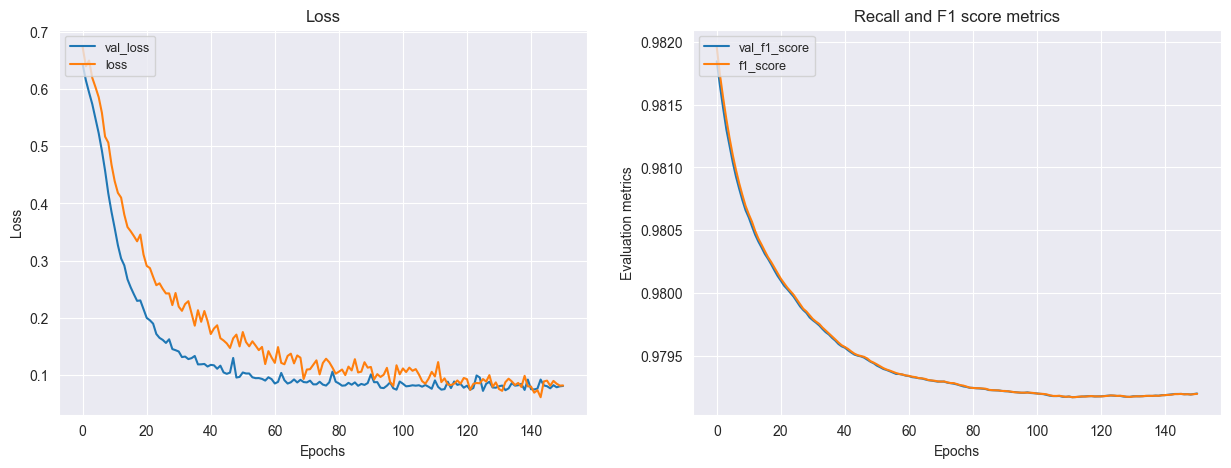

In [36]:
visualize_training_results(model2)

In [37]:
print(model2.history.keys())

dict_keys(['loss', 'f1_score', 'val_loss', 'val_f1_score'])


In [40]:
evaluation = model2.evaluate(X_test, y_test)

AttributeError: 'History' object has no attribute 'evaluate'

#### Make Predictions